# Lab 04. 계절성 모델 : 랜덤 시계열 데이터를 활용하여 실습하기
---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

- 시계열 데이터와 데이터 프레임을 생성하고 내용물을 확인해본다.

In [2]:
# 시계열 데이터 생성
np.random.seed(0)
n = 100    # 데이터 포인트 수
data = np.random.normal(0, 1, n)    # 랜덤 시계열 데이터 생성
dates = pd.date_range(start = '2022-01-01', periods=n, freq='M')

# 데이터 프레임 생성
df = pd.DataFrame({'Value': data}, index=dates)

print(df)

               Value
2022-01-31  1.764052
2022-02-28  0.400157
2022-03-31  0.978738
2022-04-30  2.240893
2022-05-31  1.867558
...              ...
2029-12-31  0.706573
2030-01-31  0.010500
2030-02-28  1.785870
2030-03-31  0.126912
2030-04-30  0.401989

[100 rows x 1 columns]


- 데이터를 시각화해본다.

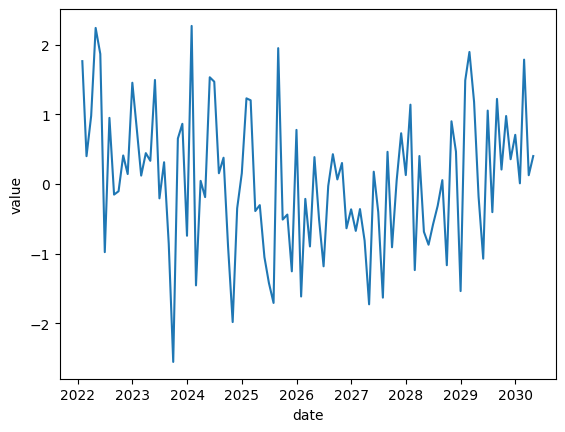

In [3]:
plt.plot(df)
plt.xlabel('date')
plt.ylabel('value')

plt.show()

- Seasonal ARIMA 모델로 핏해보고 모델 정보를 출력해본다.

In [4]:
# Seasonal ARIMA 모델 적합 및 예측
model = SARIMAX(df, order = (1, 1, 1), seasonal_order = (1, 1, 1, 12))
results = model.fit()

In [5]:
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              Value   No. Observations:                  100
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -134.870
Date:                            Tue, 20 Jun 2023   AIC                            279.739
Time:                                    22:46:43   BIC                            292.069
Sample:                                01-31-2022   HQIC                           284.704
                                     - 04-30-2030                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0495      0.132     -0.376      0.707      -0.308       0.209
ma.L1         -0.8976      0.074   

- 예측 범위를 `1922-01-31`부터 `2030-04-30`까지로 설정해본다.

In [6]:
pred = results.predict(start='2022-01-31', end='2030-04-30')

- 데이터를 시각화해본다.

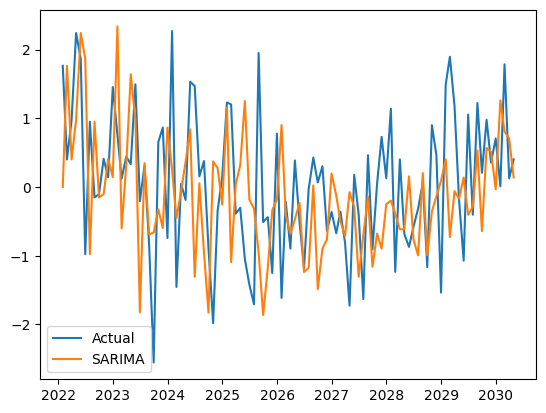

In [7]:
plt.plot(df, label='Actual')
plt.plot(pred, label='SARIMA')
plt.legend()

plt.show()